In [24]:
from torchvision import *
import torchvision as vision
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [29]:
model = models.vit_b_16(weights='IMAGENET1K_V1')
# model = torch.nn.Sequential(*(list(model.children())[:-1]))
df = pd.read_csv('../datasets/processed/pokemon.csv')
df = df.query('dex < 10')

In [30]:

# add layers to model, to complete decoder part of autoencoder
model = torch.nn.Sequential(model, torch.nn.Linear(1000, 2000))
model = torch.nn.Sequential(model, torch.nn.ReLU())
model = torch.nn.Sequential(model, torch.nn.Linear(2000, 150528))


In [41]:
# finetune model on pokemon dataset
epochs = 10
batch_size = 1
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()

In [42]:
for epoch in range(epochs):
    for i in range(len(df)):
        img = Image.open(df['image'][i])
        # reshape img to be output shape
        img = img.convert('RGB')
        img = vision.transforms.Resize((224, 224))(img)
        img = vision.transforms.ToTensor()(img)
        img = img.unsqueeze(0)
        img = img.flatten()
        image = Image.open(df['image'][i])
        image = image.convert('RGB')
        image = vision.transforms.Resize((224, 224))(image)
        image = vision.transforms.ToTensor()(image)
        image = image.unsqueeze(0)
        output = model(image)
        loss = criterion(input= output,target= img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f'Epoch: {epoch}, Loss: {loss}')

# save model
torch.save(model, 'pokemon_autoencoder.pth')


/Users/christianrasmussen/opt/miniconda3/envs/ml_project/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([150528])) that is different to the input size (torch.Size([1, 150528])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0, Loss: 0.071983203291893
Epoch: 0, Loss: 0.09133221954107285
Epoch: 0, Loss: 0.1061573401093483
Epoch: 0, Loss: 0.1425744891166687
Epoch: 0, Loss: 0.08724913746118546
Epoch: 0, Loss: 0.08357314020395279
Epoch: 0, Loss: 0.11079128831624985
Epoch: 0, Loss: 0.16600067913532257
Epoch: 0, Loss: 0.13907213509082794


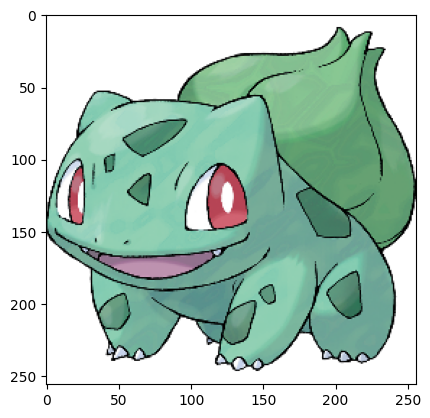

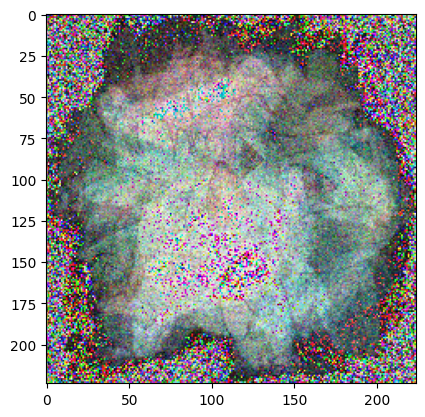

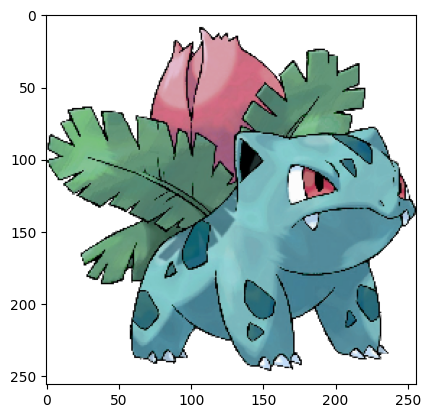

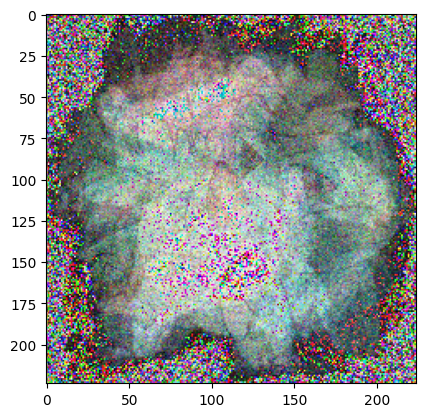

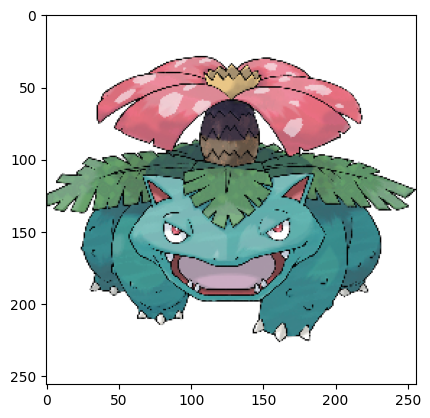

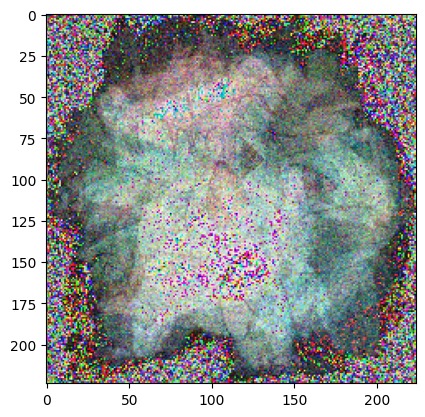

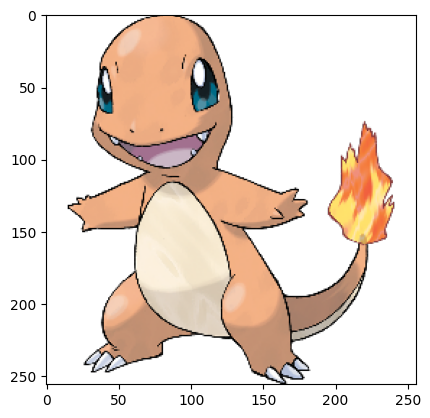

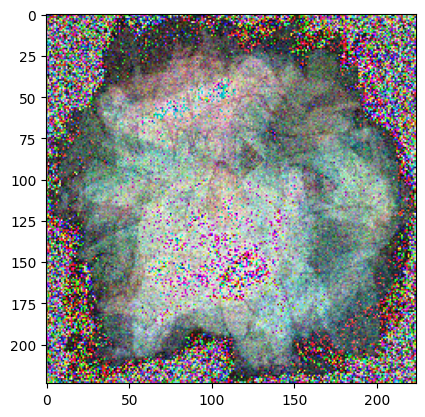

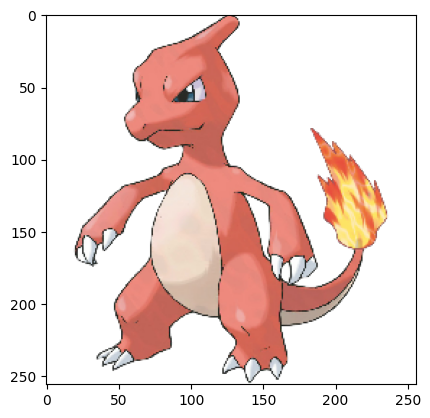

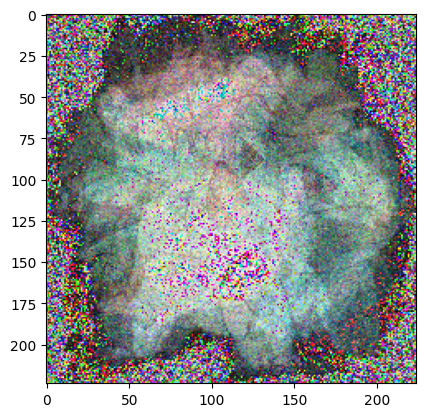

In [ ]:
# show 5 reconstructed images
for i in range(1):
    img = Image.open(df['image'][i])
    image = Image.open(df['image'][i])
    image = image.convert('RGB')
    image = vision.transforms.Resize((224, 224))(image)
    image = vision.transforms.ToTensor()(image)
    image = image.unsqueeze(0)
    output = model(image)
    output = output.view(3, 224, 224)
    output = vision.transforms.ToPILImage()(output)
    plt.figure(i+10)
    plt.imshow(img)
    plt.show()
    plt.figure(i+20)
    plt.imshow(output)
    plt.show()

In [ ]:
output = model(image)
output = output.view(3, 224, 224)
output = vision.transforms.ToPILImage()(output)